In [5]:
import math
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
from typing import List

# Set theme to "whitegrid"
# Applies both to Matplotlib and Seaborn (Seaborn internally uses matplotlib)
sns.set_style("whitegrid")

# Make custom color palette from list of colors
PLOT_COLORS: List[str] = [
    "#F72585",
    "#B5179E",
    "#7209B7",
    "#560BAD",
    "#480CA8",
    "#3A0CA3",
    "#3F37C9",
    "#4361EE",
    "#4895EF",
    "#4CC9F0",
]

custom_palette = sns.color_palette(PLOT_COLORS)

# Silence seaborn FutureWarning and UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


def get_color(i: int) -> str:
    return PLOT_COLORS[i % len(PLOT_COLORS)]

In [7]:
df = pd.read_csv("../data/wdi_fertility_data_prepped.csv")

df = df.drop(columns=["Unnamed: 0"], axis=1, errors="ignore")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     320 non-null    int64  
 1   year_code                                320 non-null    object 
 2   country_name                             320 non-null    object 
 3   country_code                             320 non-null    object 
 4   total_fertility_rate                     320 non-null    float64
 5   gdp_2015_dollar                          320 non-null    float64
 6   gdp_per_capita_2015_dollar               320 non-null    float64
 7   gdp_growth                               319 non-null    float64
 8   physicians_per_1000                      217 non-null    float64
 9   hospital_beds_per_1000                   233 non-null    float64
 10  arable_land_hectare_per_person           320 non-n

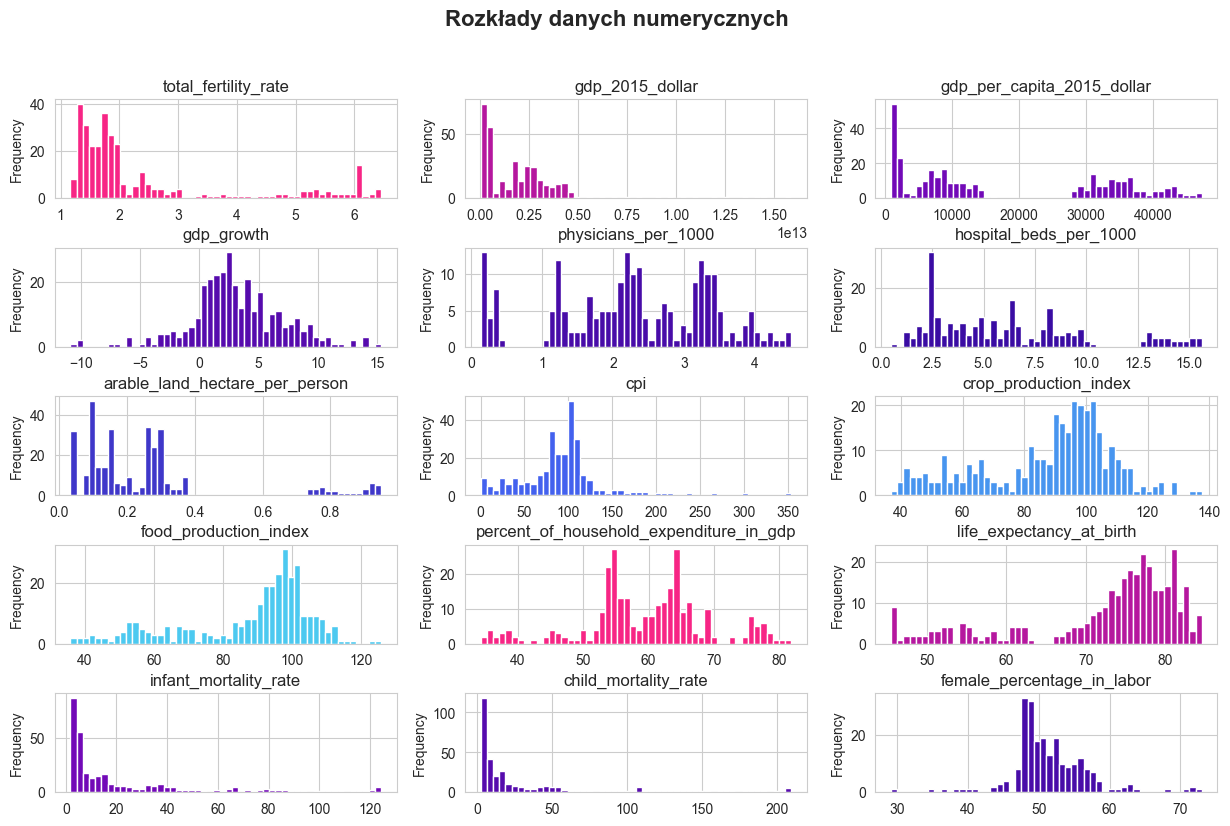

In [8]:
# Define subset df
df_numeric = df.select_dtypes(include=["float64", "int64"])

# Exclude "Year" column
df_numeric = df_numeric.drop(columns=["year"], errors="ignore")

fig, ax = plt.subplots(
    nrows=math.ceil(len(df_numeric.columns) / 3), ncols=3, figsize=(15, 9)
)

# Increase space between rows
fig.subplots_adjust(hspace=0.5)

# Title
fig.suptitle("Rozkłady danych numerycznych", fontsize=16, fontweight="bold")

for i, feature in enumerate(df_numeric.columns):
    ax_curr = ax[int(i / 3)][i % 3]
    df[feature].plot(kind="hist", ax=ax_curr, color=get_color(i), bins=50).set_title(
        feature
    )

# Remove empty subplots
for j in range(i + 1, len(ax.flatten())):
    fig.delaxes(ax.flatten()[j])

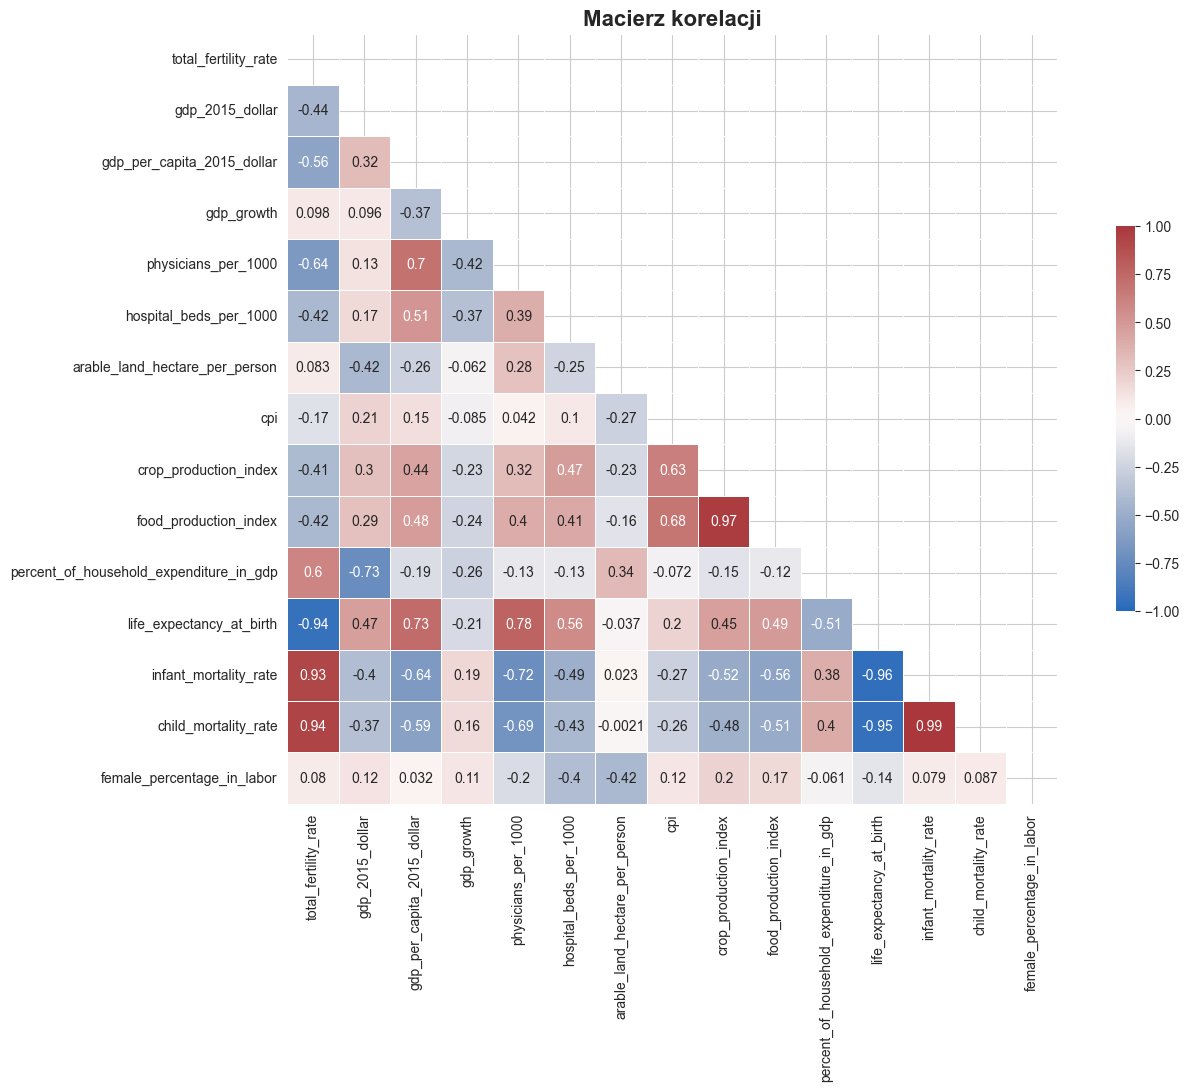

In [9]:
# Remove redundant columns
df_numeric_corr = df_numeric

# Correlation matrix
corr = df_numeric_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.color_palette("vlag", as_cmap=True)

# Create a figure with a larger size
plt.figure(figsize=(15, 10))

# Title
plt.title("Macierz korelacji", fontsize=16, fontweight="bold")

# Draw the heatmap with the mask and values
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    annot=True,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.show()

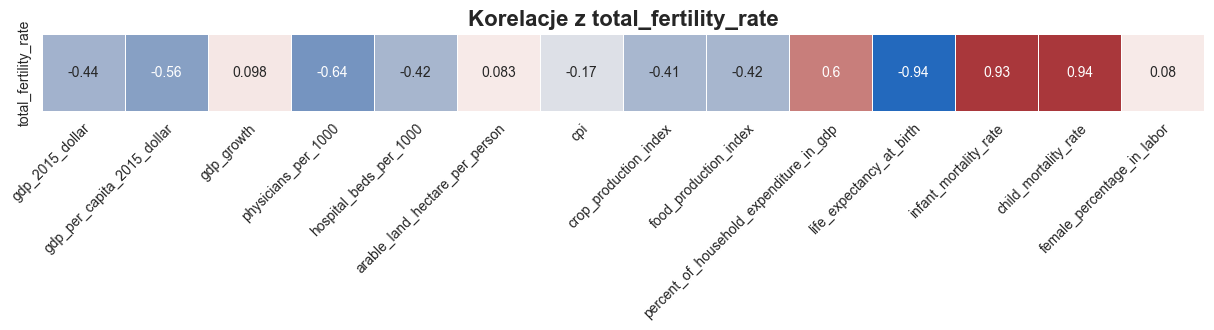

In [16]:
# Filter the correlation matrix to include only the 'total_fertility_rate' column
corr_filtered = corr[["total_fertility_rate"]].transpose()

# Exclude the correlation of total_fertility_rate with itself
corr_filtered = corr_filtered.drop(columns=["total_fertility_rate"])

# Create a figure with a larger size
plt.figure(figsize=(15, 1))

# Title
plt.title("Korelacje z total_fertility_rate", fontsize=16, fontweight="bold")

# Draw the heatmap without the color bar
sns.heatmap(
    corr_filtered,
    cmap=cmap,
    annot=True,
    center=0,
    linewidths=0.5,
    cbar=False,
)

# Rotate x-axis labels by 45 degrees and anchor them to the right
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

plt.show()